In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs=8

In [3]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
ERROR: pip's dependency 

In [4]:
from fastai import *
from fastbook import *
from fastai.vision import *
import os

In [16]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [17]:
%cd /content/drive/My Drive/Mastercourse/Jersey Recogniser

/content/drive/My Drive/Mastercourse/Jersey Recogniser


In [ ]:
doc(search_images_ddg)

In [18]:
jersey_labels=[
    'Manchester United Jersey',
    'Chelsea Jersey',
    'Real Madrid Jersey',
    'Arsenal Jersey',
    'Newcastle Jersey',
    'Liverpool Jersey',
    'Juventus Jersey',
    'AC Milan Jersey',
    'Inter Milan Jersey',
    'Barcelona Jersey',
    'Tottenham Jersey',
    'Bayern Munich Jersey',
    'Atletico Madrid Jersey',
    'Southampton Jersey',
    'Leeds United Jersey',
    'Manchester City Jersey',
    'Napoly Jersey',
    'FC Porto Jersey',
    'PSG Jersey',
    'Borussia Dortmund Jersey'
]
len(jersey_labels)

20

In [19]:
images=search_images_ddg(jersey_labels[0])
f"No of images => {len(images)} -- One image url => {images[0]}"

'No of images => 200 -- One image url => https://www.futbolemotion.com/imagesarticulos/159012/grandes/camiseta-adidas-manchester-united-tercera-equipacion-2021-2022-nino-glory-blue-0.jpg'

In [ ]:
doc(download_url)

In [20]:
dest="Manchester United Jersey.jpg"
download_url(images[0],dest,show_progress=False)

Path('Manchester United Jersey.jpg')

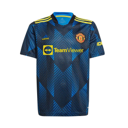

In [21]:
image=Image.open(dest)
image.to_thumb(128,128)

In [22]:
data_path='data'
if not os.path.exists(data_path):
  os.mkdir(data_path)
for jersey_type in jersey_labels:
  dest=f"{data_path}/{jersey_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)
  try:
    jersey_image_urls=search_images_ddg(jersey_type)
    download_images(dest,urls=jersey_image_urls)
  except:
    continue

In [31]:
image_counts=get_image_files(data_path)
image_counts

(#3530) [Path('data/Manchester United Jersey/4635bc40-999b-4ed2-a20f-32be2ca09b9d.jpg'),Path('data/Manchester United Jersey/65698f0c-c227-4634-a676-10065790f741.jpg'),Path('data/Manchester United Jersey/259d63ff-338b-4fb4-aaae-005a5bcf7fe0.jpg'),Path('data/Manchester United Jersey/ffbe7c22-fa65-4590-a1d1-50b3919ace8c.jpg'),Path('data/Manchester United Jersey/c93d13a0-6521-4d99-bc35-f3a46ddfe358.jpg'),Path('data/Manchester United Jersey/21b0a875-73e0-4322-8c51-71403c2ce6e3.jpg'),Path('data/Manchester United Jersey/2fab90db-269e-4dd9-aadc-c705d0a0053c.jpg'),Path('data/Manchester United Jersey/9c7ba03f-cb08-4fd2-bdc6-378645d4964c.jpg'),Path('data/Manchester United Jersey/ed80f2ad-7224-4c2b-b271-86b94f35e446.jpg'),Path('data/Manchester United Jersey/9c288364-ddd5-4f7f-b1e0-b4b49a535535.jpg')...]

In [32]:
failed=verify_images(image_counts)
failed

(#0) []

In [33]:
failed.map(Path.unlink)

(#0) []

In [34]:
dblock=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [27]:
!pip install Pillow


In [35]:
dls=dblock.dataloaders(data_path,bs=bs)

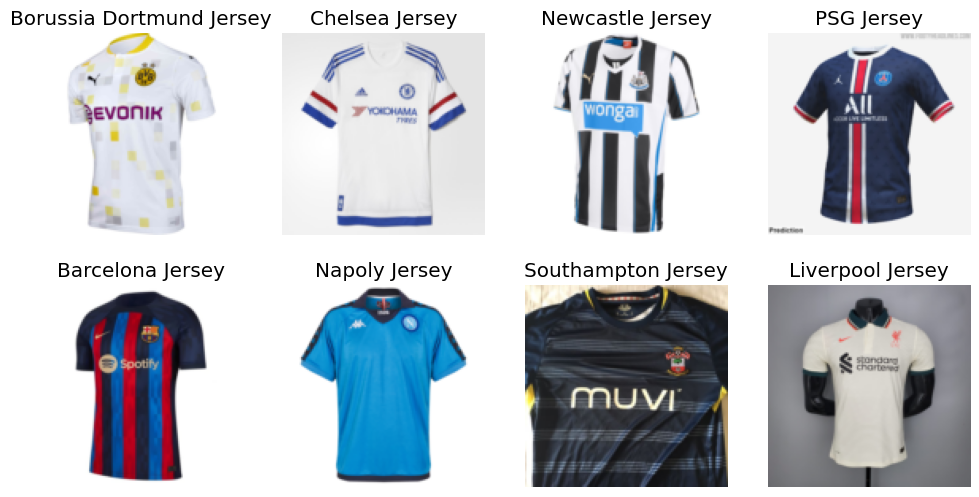

In [36]:
dls.train.show_batch(max_n=8,nrows=2)

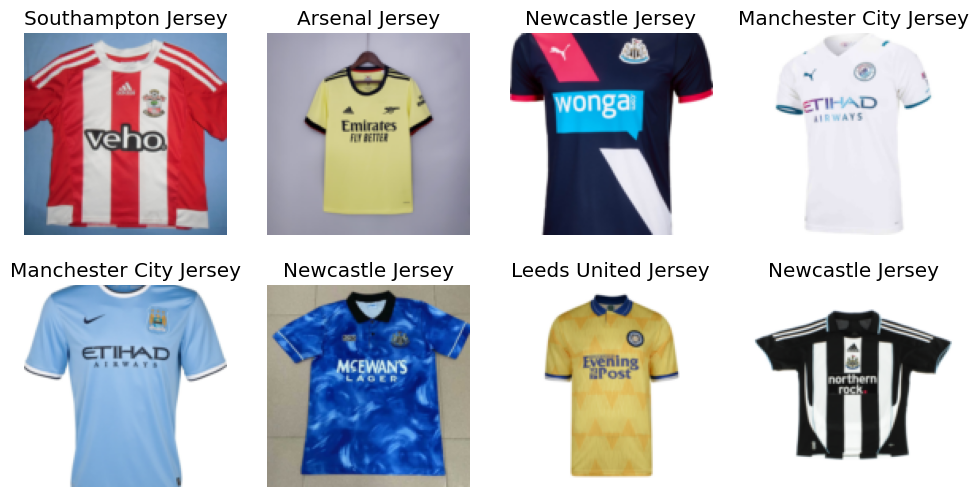

In [37]:
dls.valid.show_batch(max_n=8,nrows=2)



```
# This is formatted as code
```

# Data Augmentation

In [ ]:
doc(aug_transforms)

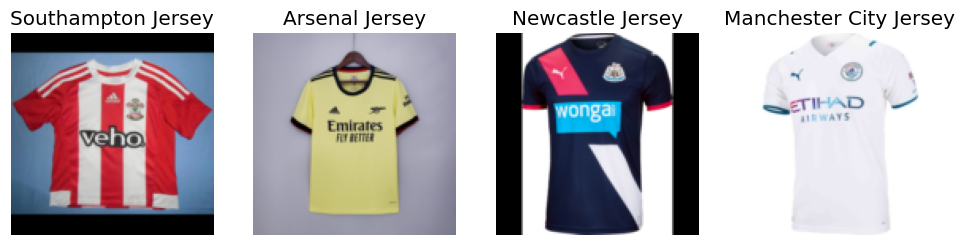

In [38]:
dblock=dblock.new(item_tfms=Resize(128,ResizeMethod.Pad,pad_mode='zeros')) #Padding the extra spaced whole image into (128x128) size without distorting
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)


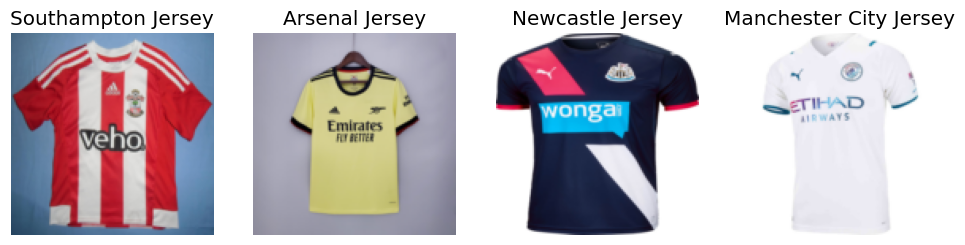

In [39]:
dblock=dblock.new(item_tfms=Resize(128,ResizeMethod.Squish)) #Squishing the whole image into (128x128 size)
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)

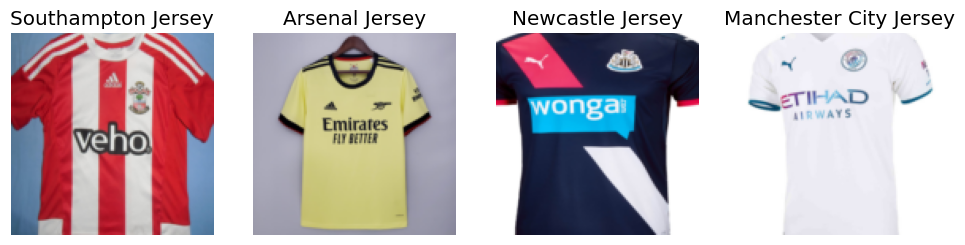

In [40]:
dblock=dblock.new(item_tfms=RandomResizedCrop(128,min_scale=0.3)) #Randomly cutting,cropping,resizing,coloring parts of image into (128x128) image
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
doc(aug_transforms)

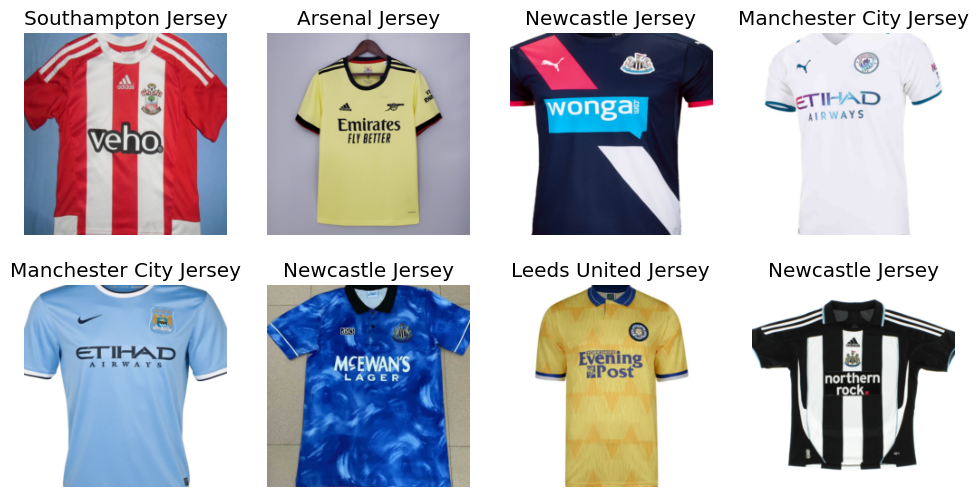

In [41]:
dblock=dblock.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms()) #Randomly cutting,cropping,resizing,coloring parts of image into (128x128) image
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8,nrows=2)

In [42]:
torch.save(dls,"jersey_dataloader_v0.pk1")